Прогнозирование конечных свойств новых материалов (композиционных материалов). 
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. 
Актуальность: Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
Датасет состоит из двух excel-файлов: 
X_bp -  датасет со слеюущими характеристиками композитов: 
- Соотношение матрица-наполнитель;
- Плотность, кг/м3;
- модуль упругости, ГПа;
- Количество отвердителя, м.%;
- Содержание эпоксидных групп,%_2;
- Температура вспышки, С_2;
- Поверхностная плотность, г/м2;
- Модуль упругости при растяжении, ГПа;
- Прочность при растяжении, МПа;
- Потребление смолы, г/м2.
X_nup - датасет со следующими характеристиками композитов: 
- Угол нашивки, град;
- Шаг нашивки; 
- Плотность нашивки.
Строки проиндексированы, согласно постановке задачи для ВКР необходимо объединить датасеты по индексу с типом объединения INNER.


**Импорт библиотек, используемых в процессе загрузки, исследования и обработки данных**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import itertools
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from scipy import stats
from keras.models import Sequential
from keras import models
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

**Загрузка исходных данных из датасетов**

In [2]:
ds_Х_bp = pd.read_excel('C:/Users/User/Downloads/ВКР Моя/X_bp.xlsx', index_col=0)
ds_X_nup = pd.read_excel('C:/Users/User/Downloads/ВКР Моя/X_nup.xlsx', index_col=0)

**Исследуем загруженные датасеты**


In [3]:
ds_Х_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Индекс                                                      
0                              1.857143            2030.0   
1                              1.857143            2030.0   
2                              1.857143            2030.0   
3                              1.857143            2030.0   
4                              2.771331            2030.0   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
Индекс                                                       
0                  738.736842                        30.00   
1                  738.736842                        50.00   
2                  738.736842                        49.90   
3                  738.736842                       129.00   
4                  753.000000                       111.86   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Индекс                                                              
0                             22.267857                100.000000   
1                             23.750000                284.615385   
2                             33.000000                284.615385   
3                             21.250000                300.000000   
4                             22.267857                284.615385   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Индекс                                                                        
0                               210.0                                  70.0   
1                               210.0                                  70.0   
2                               210.0                                  70.0   
3                               210.0                                  70.0   
4                               210.0                                  70.0   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
Индекс                                                          
0                              3000.0                    220.0  
1                              3000.0                    220.0  
2                              3000.0                    220.0  
3                              3000.0                    220.0  
4                              3000.0                    220.0

In [4]:
ds_Х_bp.shape

(1023, 10)

In [5]:
ds_X_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
Индекс                                                    
0                        0          4.0               57.0
1                        0          4.0               60.0
2                        0          4.0               70.0
3                        0          5.0               47.0
4                        0          5.0               57.0

In [6]:
ds_X_nup.shape

(1040, 3)

Первый датасет содержит 1023 строки и 10 характеристик материала, Второй датасет содержит 1040 строк и 3 характеристики материала


**Объединяем датасет с типом объединения INNER**

In [7]:
ds_X = ds_Х_bp.merge(ds_X_nup, how = 'inner', left_index=True, right_index=True)

In [8]:
ds_X.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Индекс                                                      
0                              1.857143            2030.0   
1                              1.857143            2030.0   
2                              1.857143            2030.0   
3                              1.857143            2030.0   
4                              2.771331            2030.0   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
Индекс                                                       
0                  738.736842                        30.00   
1                  738.736842                        50.00   
2                  738.736842                        49.90   
3                  738.736842                       129.00   
4                  753.000000                       111.86   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Индекс                                                              
0                             22.267857                100.000000   
1                             23.750000                284.615385   
2                             33.000000                284.615385   
3                             21.250000                300.000000   
4                             22.267857                284.615385   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Индекс                                                                        
0                               210.0                                  70.0   
1                               210.0                                  70.0   
2                               210.0                                  70.0   
3                               210.0                                  70.0   
4                               210.0                                  70.0   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
Индекс                                                           
0                              3000.0                    220.0   
1                              3000.0                    220.0   
2                              3000.0                    220.0   
3                              3000.0                    220.0   
4                              3000.0                    220.0   

        Угол нашивки, град  Шаг нашивки  Плотность нашивки  
Индекс                                                      
0                        0          4.0               57.0  
1                        0          4.0               60.0  
2                        0          4.0               70.0  
3                        0          5.0               47.0  
4                        0          5.0               57.0

In [9]:
ds_X.shape

(1023, 13)

В объединенном таким образом датасете осталось 1023 строки. 

In [11]:
ds_X.to_excel('C:/Users/User/Downloads/ВКР Моя/ds_X.xlsx')

**Разведочный анализ данных в объединенном датасете**
Необходимо 
-нарисовать гистограммы распределения каждой из переменной, 
-диаграммы ящика с усами, 
-попарные графики рассеяния точек. 
Необходимо также для каждой колонки 
-получить среднее, 
-медианное значение, 
-провести анализ и исключение выбросов, 
-проверить наличие пропусков.

In [12]:
#проверка наличия пропусков в датасете#
ds_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [13]:
ds_X.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:ylabel='Индекс'>

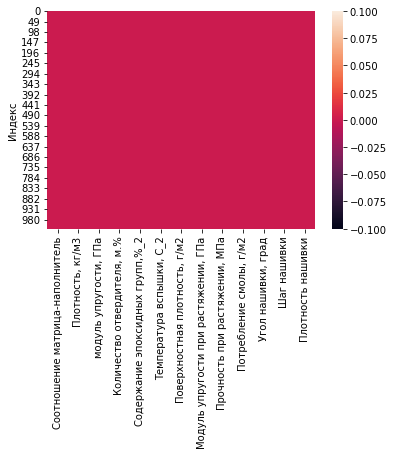

In [14]:
sns.heatmap(ds_X.isnull())

В исследуемом датасете пропуски отсутствуют.

In [15]:
#Для каждой колонки получаем среднее значение#
ds_X.mean(axis=0)

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [16]:
#Для каждой колонки получаем медианное значение#
ds_X.median(axis=0)

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

**Рисуем гистограммы распределения для каждой из переменных.**

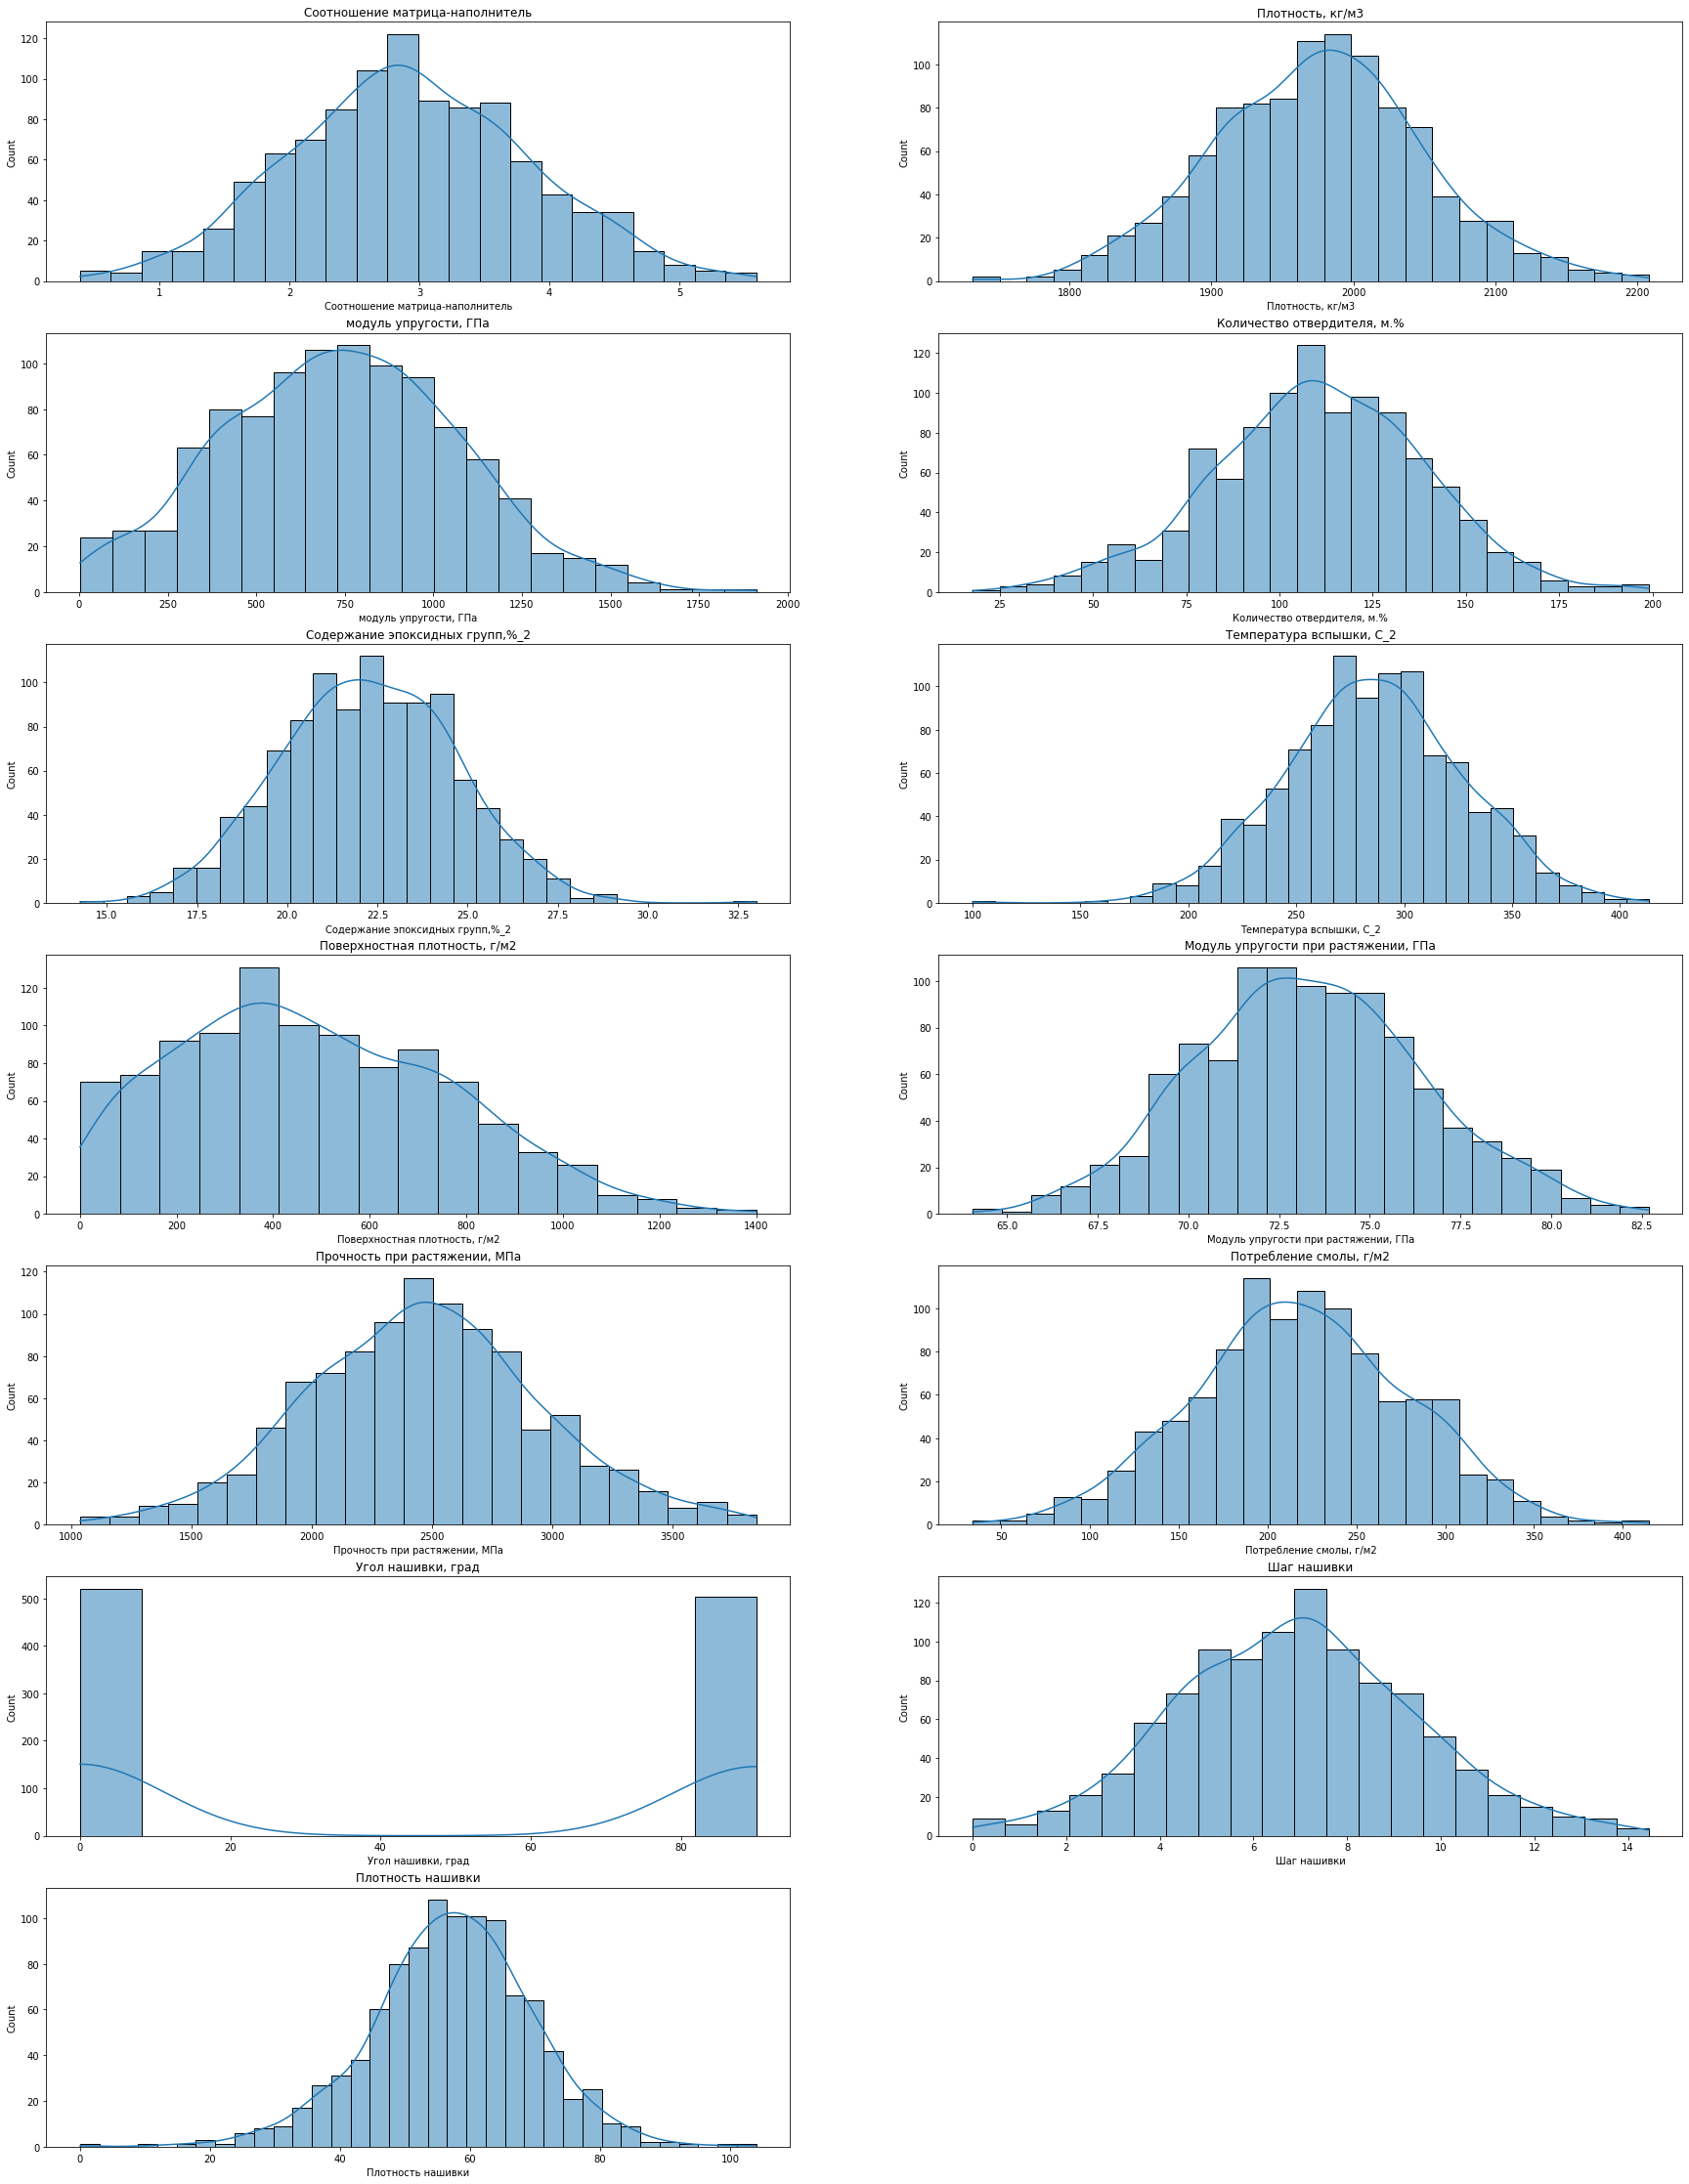

<Figure size 432x288 with 0 Axes>

In [18]:
A = 1

fig = plt.figure(figsize=(30, 40))
for i in ds_X.columns:
    plt.subplot(7, 2, A )
    plt.title(i)
    plt.xlabel(i)
    sns.histplot(ds_X[i], kde=True)
    A = A + 1
   
plt.show()
plt.savefig(f'C:/Users/User/Downloads/ВКР Моя/Gist.jpg', 
              dpi = 200, bbox_inches = 'tight', pad_inches = 0.9)

Все характеристики в датасете, кроме угла нашивки (т.к. характеристика принимает только дискретные значения 0 градусов и 90 градусов), имеют нормальное распределение

**Рисуем диаграмму ящика с усами для каждой из характеристик**

In [19]:
def yashik (data_set):
  for column in data_set:
    plt.figure(figsize=(30,4))
   
    plt.subplot(122)
    sns.boxplot(data=data_set[column], width=0.3, palette='hot', orient='h')
    plt.xlabel(column)

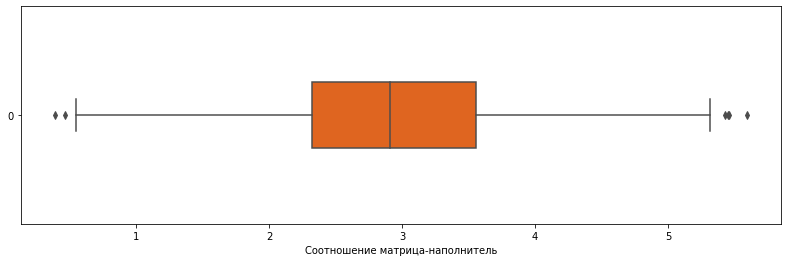

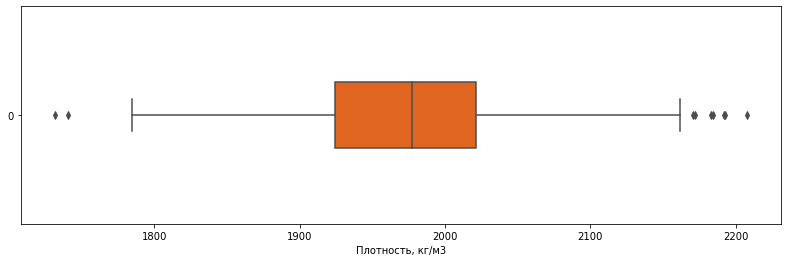

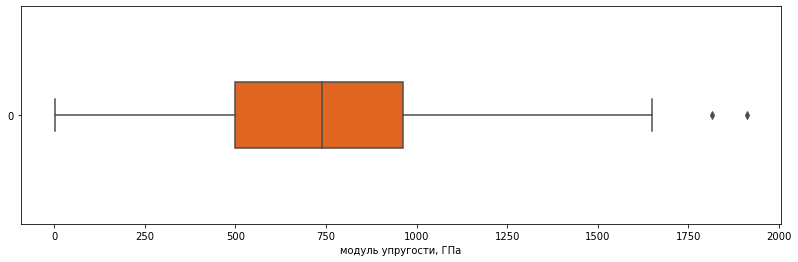

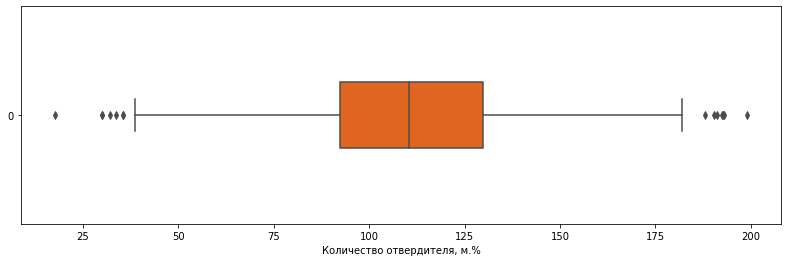

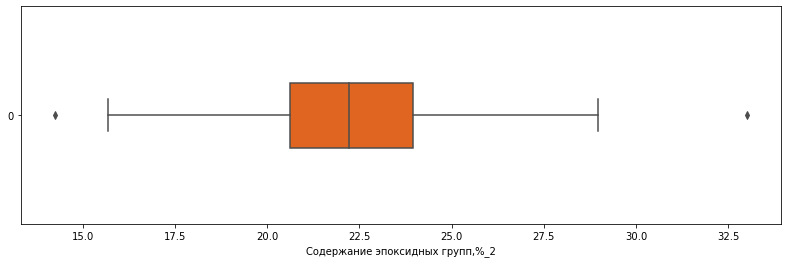

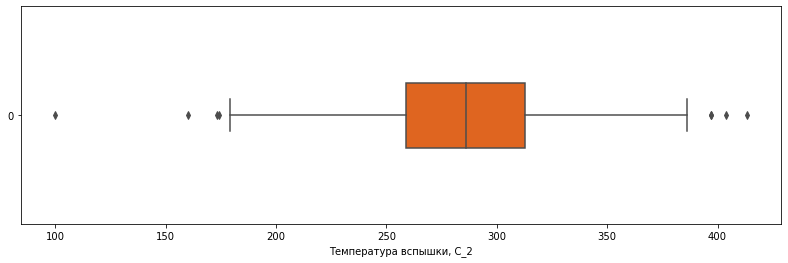

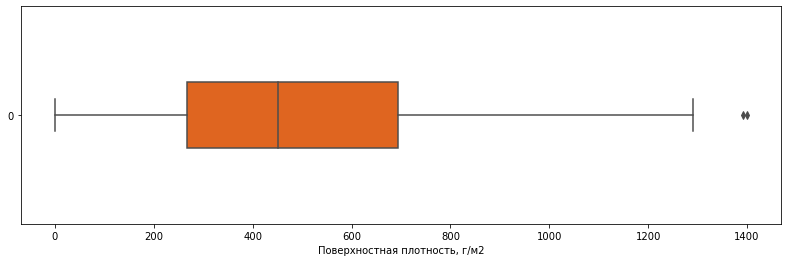

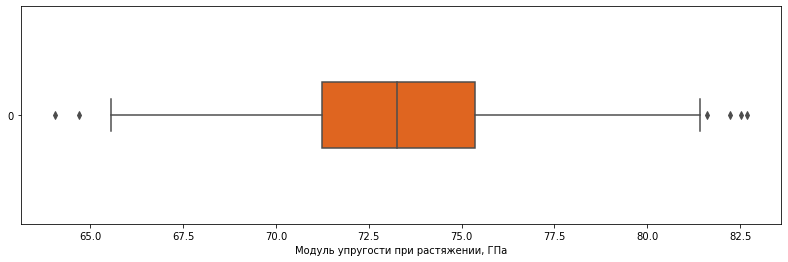

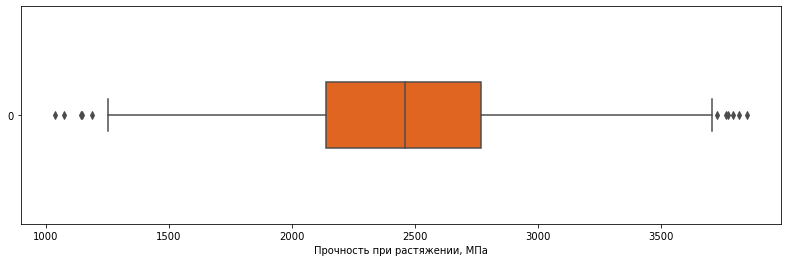

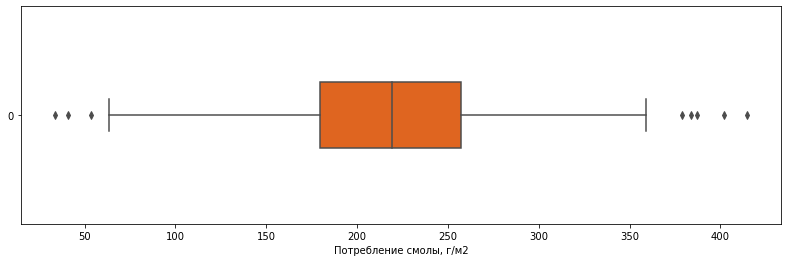

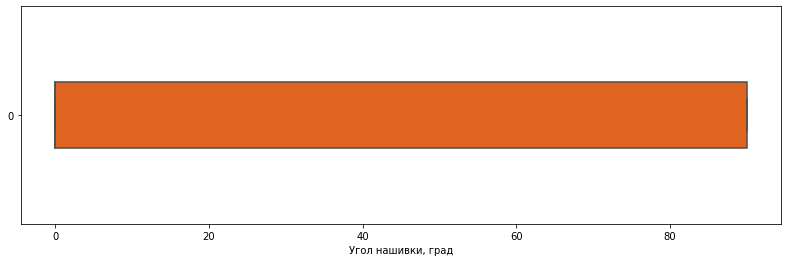

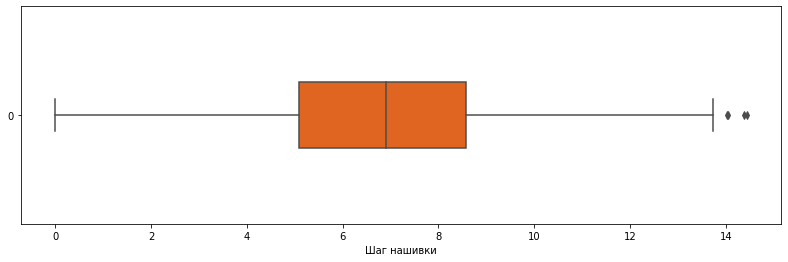

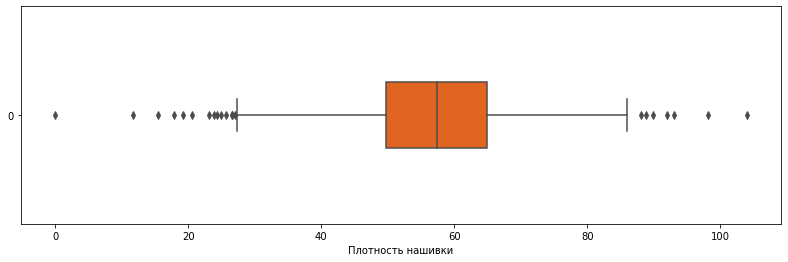

In [20]:
yashik(ds_X)


**Рисуем попарные графики рассеяния точек**


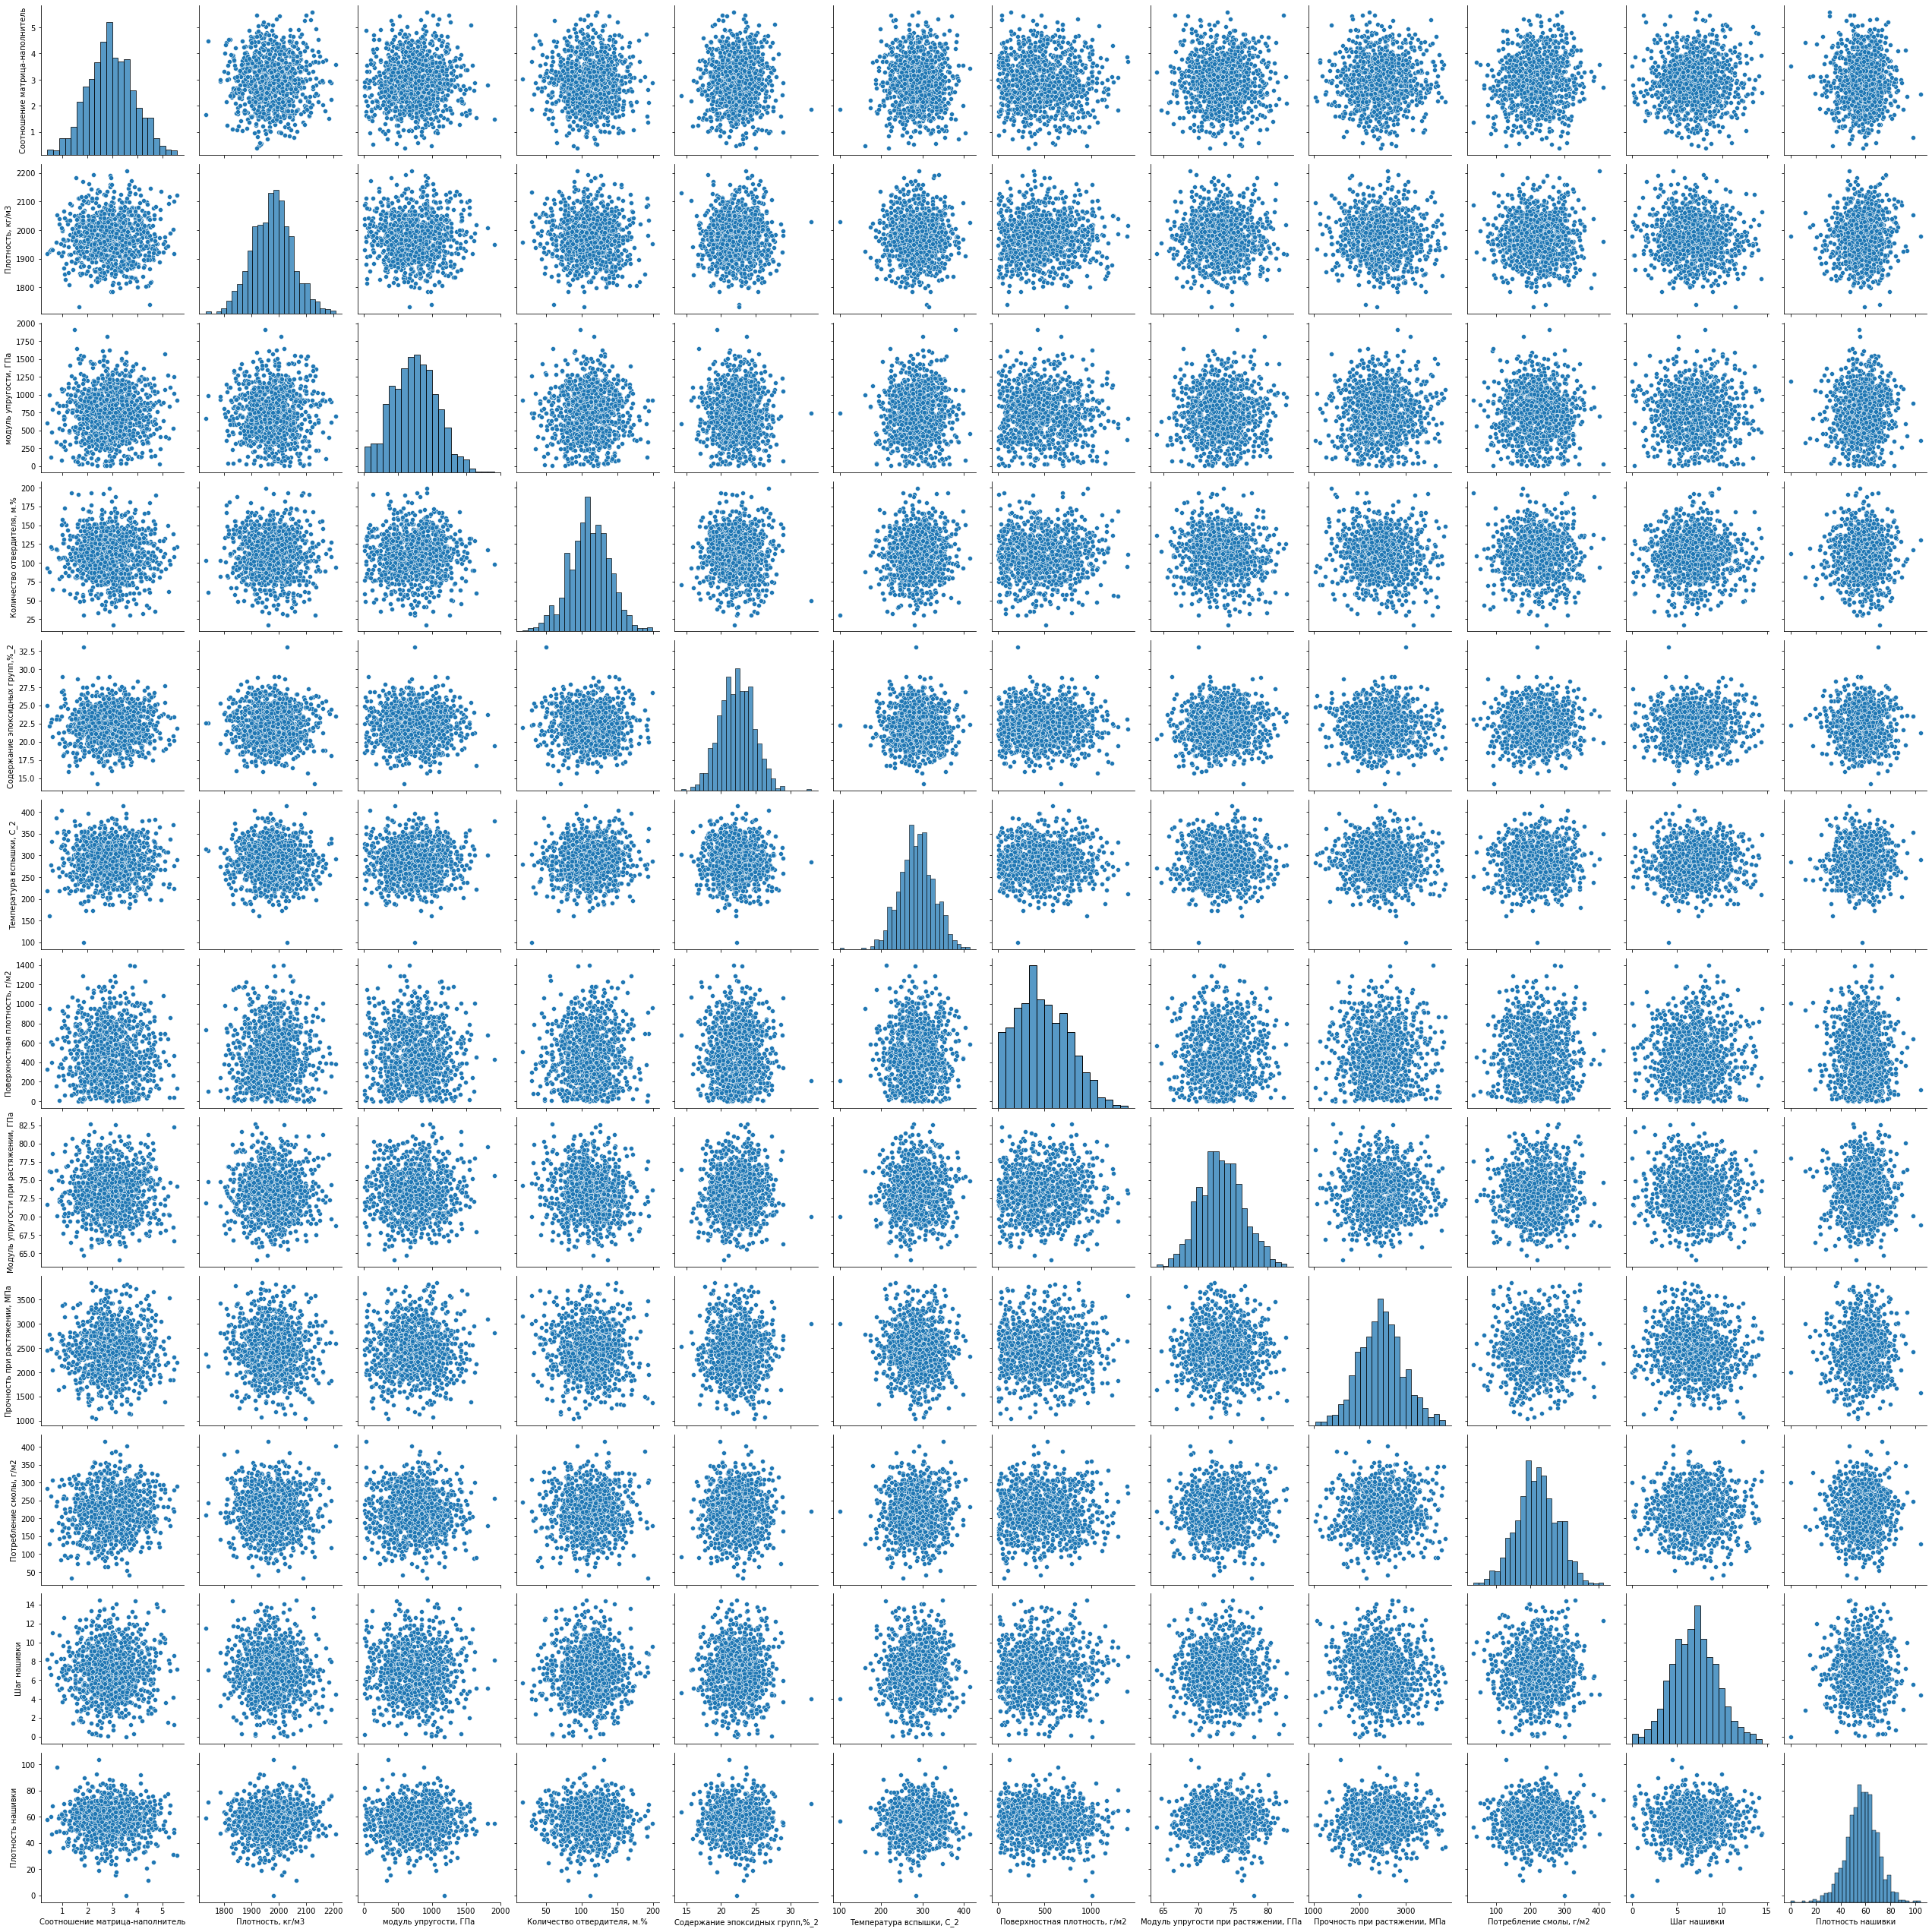

In [31]:
sns.pairplot(ds_X[ds_X.columns].drop(labels='Угол нашивки, град',  axis = 1), height=3)
plt.savefig(f'C:/Users/User/Downloads/ВКР Моя/Grafik_rass.jpg', 
              dpi = 200, bbox_inches = 'tight', pad_inches = 0.9)





Исследуем зависимость между параметрами с помощью тепловой карты

<AxesSubplot:>

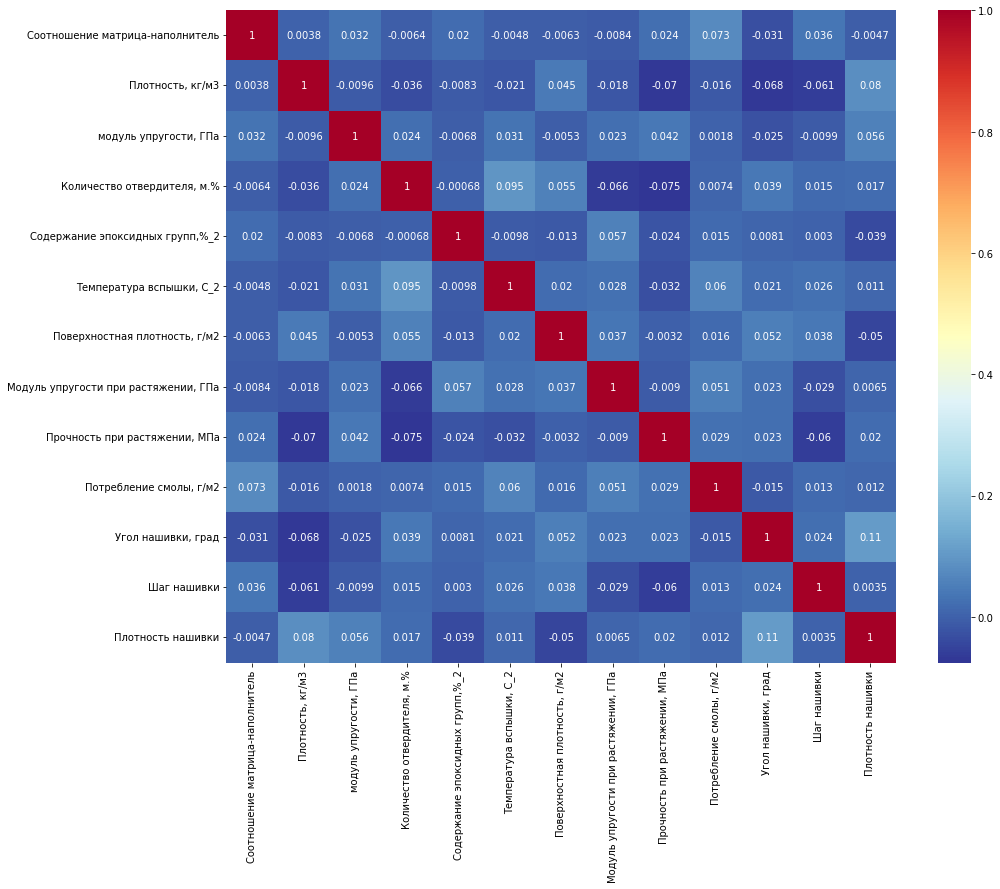

In [32]:
plt.figure(figsize = (15, 12))
sns.heatmap(ds_X.corr(), cmap = 'RdYlBu_r', annot = True)

Исходя из тепловой карты прямой корелляции между исследуемыми параметрыми не имеется.

# **ПРЕДОБРАБОТКА ДАННЫХ**

**Удаляем выбросы.**


Оцениваем выбросы с применением метода трех сигм.

In [33]:
count_v = 0
for column in ds_X:
    d = ds_X.loc[:, [column]]
    zscore = (ds_X[column] - ds_X[column].mean()) / ds_X[column].std()
    d['v'] = zscore.abs() > 3
    count_v += d['v'].sum()
    
print('Количество выбросов:', count_v)

Количество выбросов: 24


Найдем распределение выбросов по параметрам

In [34]:
v = ds_X.copy()
for i in ds_X.columns:
    v[i] = abs((ds_X[i] - ds_X[i].mean()) / ds_X[i].std())
    print(f'количество выбросов в параметре {i} - {sum(v[i] > 3)} ')
print(f' Всего выбросов {sum(sum(v.values > 3))}')

количество выбросов в параметре Соотношение матрица-наполнитель - 0 
количество выбросов в параметре Плотность, кг/м3 - 3 
количество выбросов в параметре модуль упругости, ГПа - 2 
количество выбросов в параметре Количество отвердителя, м.% - 2 
количество выбросов в параметре Содержание эпоксидных групп,%_2 - 2 
количество выбросов в параметре Температура вспышки, С_2 - 3 
количество выбросов в параметре Поверхностная плотность, г/м2 - 2 
количество выбросов в параметре Модуль упругости при растяжении, ГПа - 0 
количество выбросов в параметре Прочность при растяжении, МПа - 0 
количество выбросов в параметре Потребление смолы, г/м2 - 3 
количество выбросов в параметре Угол нашивки, град - 0 
количество выбросов в параметре Шаг нашивки - 0 
количество выбросов в параметре Плотность нашивки - 7 
 Всего выбросов 24


Таким образом, с учетом количества выбросов и распределения выбросов по параметрам, их удаление не приведет к существенному уменьшению выборки.

удаляем выбросы

In [35]:
ds_Xv = ds_X[(np.abs(stats.zscore(ds_X)) <= 3).all(axis=1)]
ds_Xv

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Индекс                                                      
1                              1.857143       2030.000000   
3                              1.857143       2030.000000   
4                              2.771331       2030.000000   
5                              2.767918       2000.000000   
6                              2.569620       1910.000000   
...                                 ...               ...   
1018                           2.271346       1952.087902   
1019                           3.444022       2050.089171   
1020                           3.280604       1972.372865   
1021                           3.705351       2066.799773   
1022                           3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
Индекс                                                       
1                  738.736842                    50.000000   
3                  738.736842                   129.000000   
4                  753.000000                   111.860000   
5                  748.000000                   111.860000   
6                  807.000000                   111.860000   
...                       ...                          ...   
1018               912.855545                    86.992183   
1019               444.732634                   145.981978   
1020               416.836524                   110.533477   
1021               741.475517                   141.397963   
1022               417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Индекс                                                              
1                             23.750000                284.615385   
3                             21.250000                300.000000   
4                             22.267857                284.615385   
5                             22.267857                284.615385   
6                             22.267857                284.615385   
...                                 ...                       ...   
1018                          20.123249                324.774576   
1019                          19.599769                254.215401   
1020                          23.957502                248.423047   
1021                          19.246945                275.779840   
1022                          27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Индекс                                                                        
1                          210.000000                             70.000000   
3                          210.000000                             70.000000   
4                          210.000000                             70.000000   
5                          210.000000                             70.000000   
6                          210.000000                             70.000000   
...                               ...                                   ...   
1018                       209.198700                             73.090961   
1019                       350.660830                             72.920827   
1020                       740.142791                             74.734344   
1021                       641.468152                             74.042708   
1022                       758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
Индекс                                                           
1                         3000.000000               220.000000   
3                         3000.000000               220.000000   
4                         3000.000000               220.000000   
5                         3000.000000               220.000000   
6                         3000.000000               220.000000   
...                

Строим графики распределения для каждого из параметров

<AxesSubplot:ylabel='Density'>

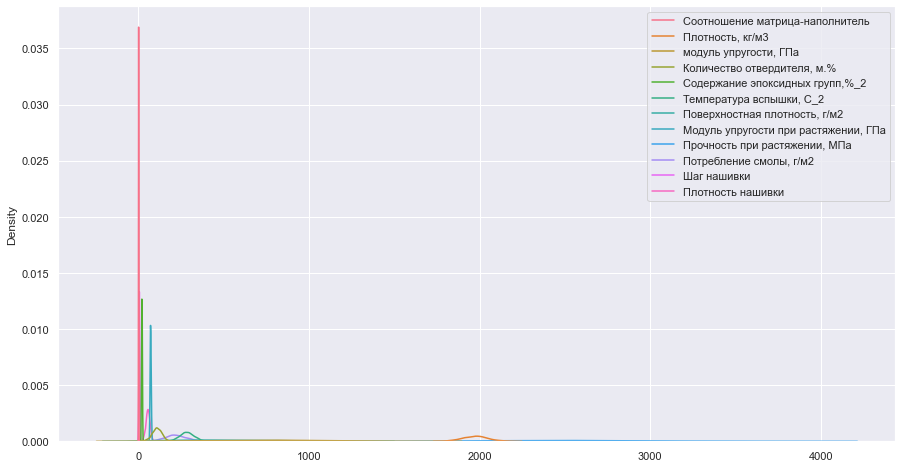

In [36]:
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
sns.kdeplot(data=ds_Xv.drop(labels='Угол нашивки, град', axis = 1))

Исходя из графиков распределения, диапазоны параметров значительно различаются. Для исключения влияния веса параметра на анализ зависимостей в датасете необходимо провести нормализацию данных.

In [37]:
scaler = MinMaxScaler()

names = ds_Xv.columns
d = scaler.fit_transform(ds_Xv)
ds_norm = pd.DataFrame(d, columns = names)
ds_norm





Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.282131          0.601381               0.447061   
1                           0.282131          0.601381               0.447061   
2                           0.457857          0.601381               0.455721   
3                           0.457201          0.527898               0.452685   
4                           0.419084          0.307448               0.488508   
..                               ...               ...                    ...   
994                         0.361750          0.410540               0.552781   
995                         0.587163          0.650588               0.268550   
996                         0.555750          0.460227               0.251612   
997                         0.637396          0.691520               0.448724   
998                         0.657131          0.259472               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.123047                         0.607435   
1                       0.608021                         0.418887   
2                       0.502800                         0.495653   
3                       0.502800                         0.495653   
4                       0.502800                         0.495653   
..                           ...                              ...   
994                     0.350139                         0.333908   
995                     0.712271                         0.294428   
996                     0.494656                         0.623085   
997                     0.684130                         0.267818   
998                     0.609147                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.482823                       0.162230   
1                    0.549664                       0.162230   
2                    0.482823                       0.162230   
3                    0.482823                       0.162230   
4                    0.482823                       0.162230   
..                        ...                            ...   
994                  0.657301                       0.161609   
995                  0.350746                       0.271207   
996                  0.325580                       0.572959   
997                  0.444436                       0.496511   
998                  0.553803                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.321894                       0.698235   
1                                0.321894                       0.698235   
2                                0.321894                       0.698235   
3                                0.321894                       0.698235   
4                                0.321894                       0.698235   
..                                    ...                            ...   
994                              0.489229                       0.480312   
995                              0.480019                       0.470745   
996                              0.578197                       0.578340   
997                              0.540754                       0.368070   
998                              0.555208                       0.647135   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.517418                 0.0     0.275109   
1                   0.517418                 0.0     0.344539   
2                   0.517418                 0.0     0.344539   
3                   0.517418                 0.0     0.344539   
4                   0.517418                 0.0     0.344539   
..                       ...                 ...          ...   
994                 0.242759                 1.0     0.627565   
9

<AxesSubplot:ylabel='Density'>

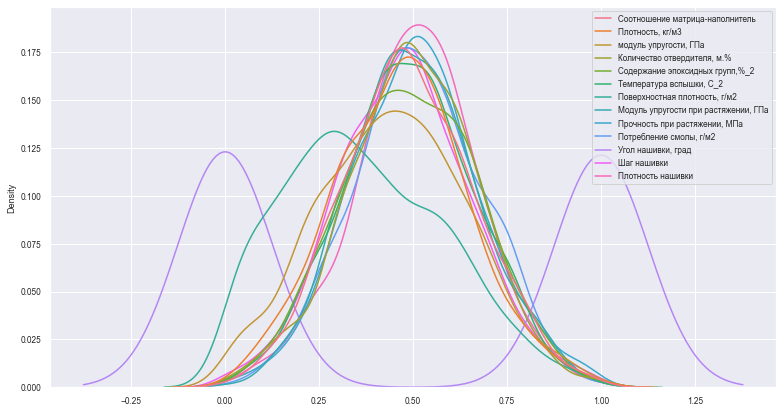

In [38]:
sns.set(font_scale=0.75)
plt.figure(figsize = (13,7))
sns.kdeplot(data=ds_norm)

# **Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении. **
В целях построения модели используется 70% данных для обучающей выборки,  30% данных резервируется для тестирование модели. 

In [39]:
#создадим выборку с исключением целевых параметров

ds_train = ds_norm.drop(['Модуль упругости при растяжении, ГПа' , 'Прочность при растяжении, МПа'], axis=1)
ds_train

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.282131          0.601381               0.447061   
1                           0.282131          0.601381               0.447061   
2                           0.457857          0.601381               0.455721   
3                           0.457201          0.527898               0.452685   
4                           0.419084          0.307448               0.488508   
..                               ...               ...                    ...   
994                         0.361750          0.410540               0.552781   
995                         0.587163          0.650588               0.268550   
996                         0.555750          0.460227               0.251612   
997                         0.637396          0.691520               0.448724   
998                         0.657131          0.259472               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.123047                         0.607435   
1                       0.608021                         0.418887   
2                       0.502800                         0.495653   
3                       0.502800                         0.495653   
4                       0.502800                         0.495653   
..                           ...                              ...   
994                     0.350139                         0.333908   
995                     0.712271                         0.294428   
996                     0.494656                         0.623085   
997                     0.684130                         0.267818   
998                     0.609147                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.482823                       0.162230   
1                    0.549664                       0.162230   
2                    0.482823                       0.162230   
3                    0.482823                       0.162230   
4                    0.482823                       0.162230   
..                        ...                            ...   
994                  0.657301                       0.161609   
995                  0.350746                       0.271207   
996                  0.325580                       0.572959   
997                  0.444436                       0.496511   
998                  0.553803                       0.587373   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.517418                 0.0     0.275109   
1                   0.517418                 0.0     0.344539   
2                   0.517418                 0.0     0.344539   
3                   0.517418                 0.0     0.344539   
4                   0.517418                 0.0     0.344539   
..                       ...                 ...          ...   
994                 0.242759                 1.0     0.627565   
995                 0.221717                 1.0     0.730963   
996                 0.565435                 1.0     0.286298   
997                 0.451281                 1.0     0.435716   
998                 0.444423                 1.0     0.419448   

     Плотность нашивки  
0             0.544652  
1             0.365074  
2             0.503211  
3             0.544652  
4             0.682789  
..                 ...  
994           0.365347  
995           0.458327  
996           0.650046  
997           0.520631  
998           0.785487  

[999 rows x 11 columns]

In [40]:
#Выборка для целевого параметра "Модуль упругости при растяжении"
ds_test = ds_norm[['Модуль упругости при растяжении, ГПа']]

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(ds_train, ds_test, test_size=0.3, random_state=42)

In [42]:
#Проверяем корректность составления выборки 
X_test


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
453                         0.460230          0.504115               0.199740   
793                         0.413177          0.303514               0.531159   
209                         0.407619          0.312874               0.639753   
309                         0.523585          0.577646               0.231072   
740                         0.403561          0.332152               0.320253   
..                               ...               ...                    ...   
314                         0.352521          0.355420               0.268217   
404                         0.468569          0.536023               0.539443   
7                           0.604139          0.772842               0.861312   
155                         0.796758          0.444291               0.259211   
809                         0.391502          0.336812               0.742792   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
453                     0.597315                         0.331510   
793                     0.752306                         0.474920   
209                     0.351407                         0.466639   
309                     0.611574                         0.384861   
740                     0.589935                         0.732173   
..                           ...                              ...   
314                     0.575407                         0.363834   
404                     0.767425                         0.661113   
7                       0.608021                         0.418887   
155                     0.604350                         0.622283   
809                     0.530584                         0.991991   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
453                  0.246530                       0.446881   
793                  0.530242                       0.393463   
209                  0.342559                       0.604889   
309                  0.576115                       0.602260   
740                  0.641705                       0.259802   
..                        ...                            ...   
314                  0.517855                       0.363229   
404                  0.583541                       0.443477   
7                    0.549664                       0.782031   
155                  0.415966                       0.784670   
809                  0.631013                       0.528227   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
453                 0.392932                 0.0     0.595129   
793                 0.539911                 1.0     0.346653   
209                 0.478178                 0.0     0.007457   
309                 0.722667                 0.0     0.369822   
740                 0.504441                 1.0     0.925745   
..                       ...                 ...          ...   
314                 0.507238                 0.0     0.657792   
404                 0.552646                 0.0     0.253042   
7                   0.748729                 0.0     0.483401   
155                 0.477957                 0.0     0.379992   
809                 0.632430                 1.0     0.696353   

     Плотность нашивки  
453           0.321071  
793           0.635638  
209           0.463686  
309           0.469802  
740           0.395153  
..                 ...  
314           0.519736  
404           0.848706  
7             0.544652  
155           0.649848  
809           0.489920  

[300 rows x 11 columns]

In [43]:
Y_test

Модуль упругости при растяжении, ГПа
453                              0.554884
793                              0.238800
209                              0.406102
309                              0.314546
740                              0.641418
..                                    ...
314                              0.380945
404                              0.426243
7                                0.754989
155                              0.317784
809                              0.806998

[300 rows x 1 columns]

**Линейная регрессия и ее оценка для модуля упругости при растяжении**

Train MSE: 0.02782019549550725
Test MSE: 0.027947922022287807
Train MAE: 0.1332676116156599
Test MAE: 0.13669130789159387
Train r2: 0.020956397034784136
Test r2: -0.02641638989232087


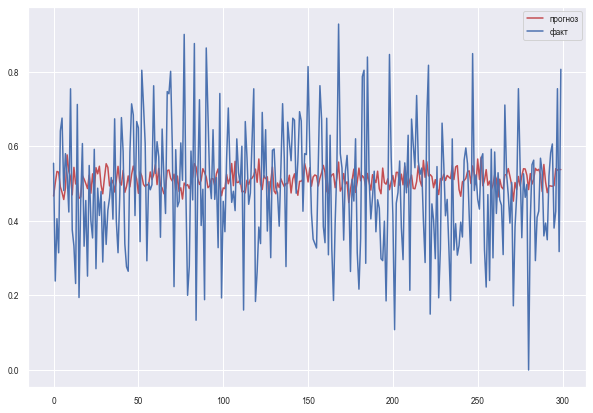

In [66]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

#Визуализация результатов


plt.figure(figsize=(10, 7))
plt.plot(test_pred, 'r')
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);


К-ближайших соседей

Train MSE: 0.02389292638484244
Test MSE: 0.033411025991682886
Train MAE: 0.12257877243196559
Test MAE: 0.14730983144406995
Train r2: 0.15916418570903001
Test r2: -0.2270545428613011


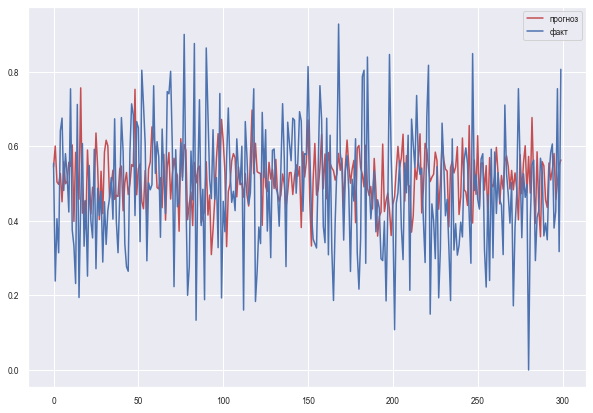

In [67]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, Y_train)

train_pred = kn.predict(X_train)
test_pred = kn.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = kn.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Случайный лес и оценка алгоритма**

Train MSE: 0.021489710399998037
Test MSE: 0.028560250794503445
Train MAE: 0.1187452487893619
Test MAE: 0.1373085570849076
Train r2: 0.24373775518253116
Test r2: -0.04890479841527151


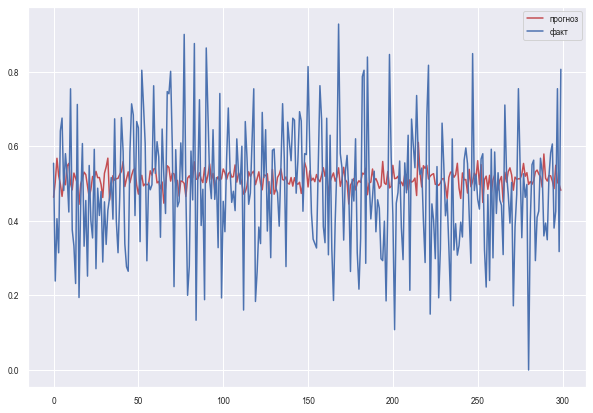

In [64]:
## Случайный лес
Randf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
Randf.fit(X_train, Y_train.values[:, 0])
train_pred = Randf.predict(X_train)
test_pred = Randf.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Подбор параметров для случайного леса**

In [56]:
Randf_tuning = RandomForestRegressor(random_state = 42)
param = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,5,7],
   'criterion' :['absolute_error'] #absolute_error=mae
}
GSCV = GridSearchCV(estimator=Randf_tuning, param_grid=param, cv=10, verbose=0)
GSCV.fit(X_train, Y_train.values[:,0])
GSCV.best_params_ 

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
модель случайный лес с подобранными параметрами

Train MSE: 0.026076086121873947
Test MSE: 0.027630027135265686
Train MAE: 0.12785192147823707
Test MAE: 0.13422268185185468
Train r2: 0.08233479839803526
Test r2: -0.01474137083214666


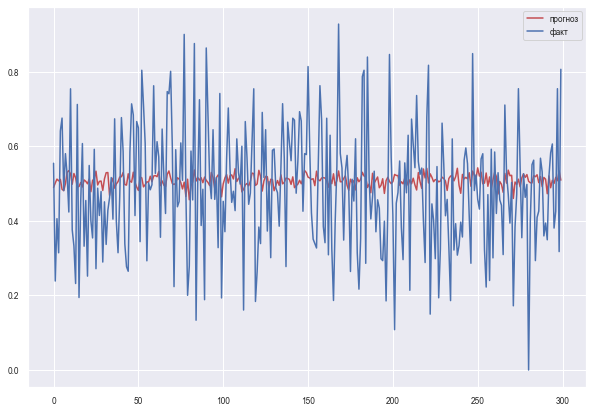

In [63]:
Randf_best = GSCV.best_estimator_
Randf_best.fit(X_train, Y_train.values[:,0])
train_pred = Randf_best.predict(X_train)
test_pred = Randf_best.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf_best.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Прочность при растяжении**

In [41]:
#создадим выборку с исключением целевых параметров

ds_train = ds_norm.drop(['Модуль упругости при растяжении, ГПа' , 'Прочность при растяжении, МПа'], axis=1)
ds_train

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.282131          0.601381               0.447061   
1                           0.282131          0.601381               0.447061   
2                           0.457857          0.601381               0.455721   
3                           0.457201          0.527898               0.452685   
4                           0.419084          0.307448               0.488508   
..                               ...               ...                    ...   
994                         0.361750          0.410540               0.552781   
995                         0.587163          0.650588               0.268550   
996                         0.555750          0.460227               0.251612   
997                         0.637396          0.691520               0.448724   
998                         0.657131          0.259472               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.123047                         0.607435   
1                       0.608021                         0.418887   
2                       0.502800                         0.495653   
3                       0.502800                         0.495653   
4                       0.502800                         0.495653   
..                           ...                              ...   
994                     0.350139                         0.333908   
995                     0.712271                         0.294428   
996                     0.494656                         0.623085   
997                     0.684130                         0.267818   
998                     0.609147                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.482823                       0.162230   
1                    0.549664                       0.162230   
2                    0.482823                       0.162230   
3                    0.482823                       0.162230   
4                    0.482823                       0.162230   
..                        ...                            ...   
994                  0.657301                       0.161609   
995                  0.350746                       0.271207   
996                  0.325580                       0.572959   
997                  0.444436                       0.496511   
998                  0.553803                       0.587373   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.517418                 0.0     0.275109   
1                   0.517418                 0.0     0.344539   
2                   0.517418                 0.0     0.344539   
3                   0.517418                 0.0     0.344539   
4                   0.517418                 0.0     0.344539   
..                       ...                 ...          ...   
994                 0.242759                 1.0     0.627565   
995                 0.221717                 1.0     0.730963   
996                 0.565435                 1.0     0.286298   
997                 0.451281                 1.0     0.435716   
998                 0.444423                 1.0     0.419448   

     Плотность нашивки  
0             0.544652  
1             0.365074  
2             0.503211  
3             0.544652  
4             0.682789  
..                 ...  
994           0.365347  
995           0.458327  
996           0.650046  
997           0.520631  
998           0.785487  

[999 rows x 11 columns]

In [42]:
#Выборка для целевого параметра "Прочность при растяжении"
ds_test = ds_norm[['Прочность при растяжении, МПа']]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(ds_train, ds_test, test_size=0.3, random_state=42)

In [44]:
#Проверяем корректность составления выборки 
X_test


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
453                         0.460230          0.504115               0.199740   
793                         0.413177          0.303514               0.531159   
209                         0.407619          0.312874               0.639753   
309                         0.523585          0.577646               0.231072   
740                         0.403561          0.332152               0.320253   
..                               ...               ...                    ...   
314                         0.352521          0.355420               0.268217   
404                         0.468569          0.536023               0.539443   
7                           0.604139          0.772842               0.861312   
155                         0.796758          0.444291               0.259211   
809                         0.391502          0.336812               0.742792   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
453                     0.597315                         0.331510   
793                     0.752306                         0.474920   
209                     0.351407                         0.466639   
309                     0.611574                         0.384861   
740                     0.589935                         0.732173   
..                           ...                              ...   
314                     0.575407                         0.363834   
404                     0.767425                         0.661113   
7                       0.608021                         0.418887   
155                     0.604350                         0.622283   
809                     0.530584                         0.991991   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
453                  0.246530                       0.446881   
793                  0.530242                       0.393463   
209                  0.342559                       0.604889   
309                  0.576115                       0.602260   
740                  0.641705                       0.259802   
..                        ...                            ...   
314                  0.517855                       0.363229   
404                  0.583541                       0.443477   
7                    0.549664                       0.782031   
155                  0.415966                       0.784670   
809                  0.631013                       0.528227   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
453                 0.392932                 0.0     0.595129   
793                 0.539911                 1.0     0.346653   
209                 0.478178                 0.0     0.007457   
309                 0.722667                 0.0     0.369822   
740                 0.504441                 1.0     0.925745   
..                       ...                 ...          ...   
314                 0.507238                 0.0     0.657792   
404                 0.552646                 0.0     0.253042   
7                   0.748729                 0.0     0.483401   
155                 0.477957                 0.0     0.379992   
809                 0.632430                 1.0     0.696353   

     Плотность нашивки  
453           0.321071  
793           0.635638  
209           0.463686  
309           0.469802  
740           0.395153  
..                 ...  
314           0.519736  
404           0.848706  
7             0.544652  
155           0.649848  
809           0.489920  

[300 rows x 11 columns]

In [45]:
Y_test

Прочность при растяжении, МПа
453                       0.787045
793                       0.288905
209                       0.352930
309                       0.399747
740                       0.458322
..                             ...
314                       0.309914
404                       0.545426
7                         0.342563
155                       0.260221
809                       0.514611

[300 rows x 1 columns]

**Линейная регрессия и ее оценка для прочности при растяжении**

Train MSE: 0.02782019549550725
Test MSE: 0.027947922022287807
Train MAE: 0.1332676116156599
Test MAE: 0.13669130789159387
Train r2: 0.020956397034784136
Test r2: -0.02641638989232087


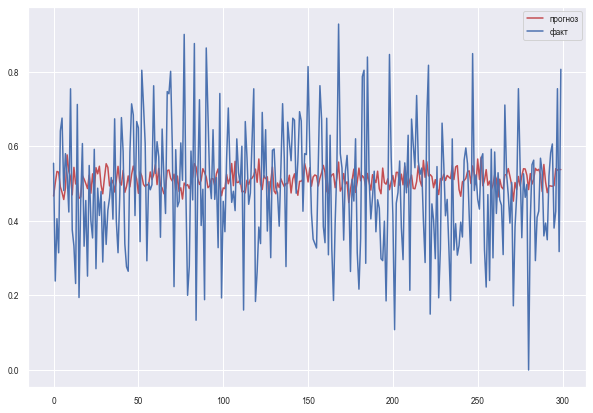

In [68]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

#Визуализация результатов


plt.figure(figsize=(10, 7))
plt.plot(test_pred, 'r')
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);


**К-ближайших соседей и оценка алгоритма для прочности при растяжении**

Train MSE: 0.02389292638484244
Test MSE: 0.033411025991682886
Train MAE: 0.12257877243196559
Test MAE: 0.14730983144406995
Train r2: 0.15916418570903001
Test r2: -0.2270545428613011


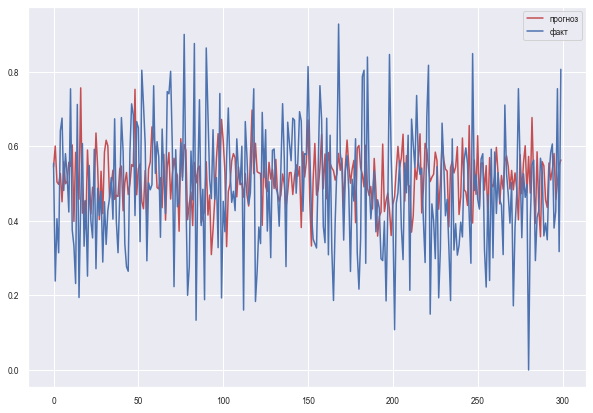

In [72]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, Y_train)

train_pred = kn.predict(X_train)
test_pred = kn.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = kn.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Случайный лес и оценка алгоритма для прочности при растяжении**

Train MSE: 0.0048028940052609334
Test MSE: 0.029454020984152174
Train MAE: 0.054980889862015936
Test MAE: 0.13845550132238457
Train r2: 0.8309773684972819
Test r2: -0.08172943456249682


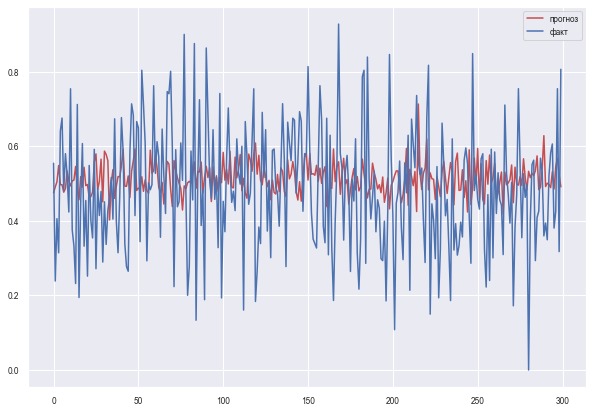

In [80]:
## Случайный лес
Randf = RandomForestRegressor(n_estimators=50, max_depth=18)
Randf.fit(X_train, Y_train.values[:, 0])
train_pred = Randf.predict(X_train)
test_pred = Randf.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Подбор параметров случайного леса для прочности при растяжении**

In [81]:
Randf_tuning = RandomForestRegressor(random_state = 42)
param = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,5,7],
   'criterion' :['absolute_error'] #absolute_error=mae
}
GSCV = GridSearchCV(estimator=Randf_tuning, param_grid=param, cv=10, verbose=0)
GSCV.fit(X_train, Y_train.values[:,0])
GSCV.best_params_ 

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
модель случайный лес с подобранными параметрами

Train MSE: 0.026076086121873947
Test MSE: 0.027630027135265686
Train MAE: 0.12785192147823707
Test MAE: 0.13422268185185468
Train r2: 0.08233479839803526
Test r2: -0.01474137083214666


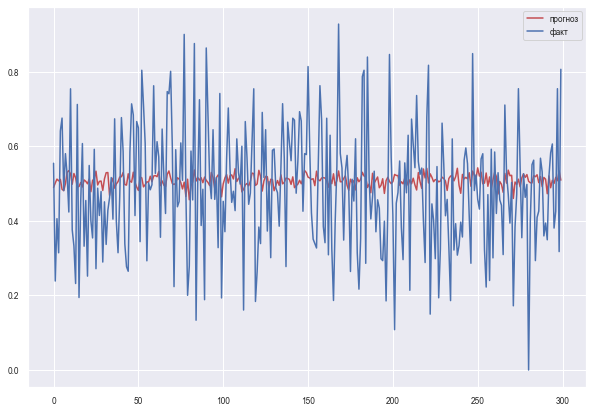

In [82]:
Randf_best = GSCV.best_estimator_
Randf_best.fit(X_train, Y_train.values[:,0])
train_pred = Randf_best.predict(X_train)
test_pred = Randf_best.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf_best.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

# **Нейронная сеть, рекомендующая соотношение матрица-наполнитель**

In [83]:
input_columns_names = ["Модуль упругости при растяжении, ГПа",
                      "Прочность при растяжении, МПа",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_columns_names = ["Соотношение матрица-наполнитель"]
                    
x = ds_norm[input_columns_names]
y = ds_norm[output_columns_names]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [85]:
x_train

Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
728                              0.654542                       0.425669   
630                              0.418297                       0.591480   
394                              0.758868                       0.404669   
777                              0.194769                       0.287087   
598                              0.619585                       0.510077   
..                                    ...                            ...   
106                              0.547650                       0.535777   
270                              0.343471                       0.388054   
860                              0.406077                       0.561964   
435                              0.535840                       0.702551   
102                              0.404535                       0.478142   

     Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
728          0.310536               0.537999                     0.546491   
630          0.235636               0.802377                     0.259220   
394          0.441630               0.268059                     0.333843   
777          0.417471               0.425821                     0.588376   
598          0.364257               0.438533                     0.412826   
..                ...                    ...                          ...   
106          0.205582               0.484470                     0.732484   
270          0.525558               0.651021                     0.547377   
860          0.571176               0.259189                     0.555590   
435          0.266050               0.496034                     0.452726   
102          0.433341               0.650703                     0.505663   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
728                         0.335904                  0.127154   
630                         0.797817                  0.635324   
394                         0.328916                  0.386612   
777                         0.701853                  0.416074   
598                         0.322036                  0.777282   
..                               ...                       ...   
106                         0.458503                  0.472615   
270                         0.393307                  0.600020   
860                         0.240760                  0.209147   
435                         0.680011                  0.395771   
102                         0.905921                  0.405177   

     Поверхностная плотность, г/м2  Потребление смолы, г/м2  \
728                       0.471386                 0.401546   
630                       0.092750                 0.653611   
394                       0.258842                 0.619496   
777                       0.417121                 0.693373   
598                       0.469110                 0.442754   
..                             ...                      ...   
106                       0.068543                 0.333484   
270                       0.451879                 0.334033   
860                       0.425643                 0.566685   
435                       0.815538                 0.563498   
102                       0.538640                 0.692440   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
728                 1.0     0.239912           0.623615  
630                 1.0     0.531643           0.494436  
394                 0.0     0.476774           0.524253  
777                 1.0     0.464783           0.739554  
598                 1.0     0.302741           0.506075  
..                  ...          ...                ...  
106                 0.0     0.454457           0.407235  
270                 0.0     0.062614           0.799226  
860                 1.0     0.296964           0.433855  
435                 0.0     0.540204 

In [86]:
y_train

Соотношение матрица-наполнитель
728                         0.485272
630                         0.455567
394                         0.682619
777                         0.520618
598                         0.361158
..                               ...
106                         0.620063
270                         0.411915
860                         0.535490
435                         0.423902
102                         0.907549

[699 rows x 1 columns]

In [87]:
x_train.describe().T.round(2)

count  mean   std   min   25%   50%  \
Модуль упругости при растяжении, ГПа  699.0  0.51  0.17  0.03  0.40  0.50   
Прочность при растяжении, МПа         699.0  0.51  0.17  0.01  0.39  0.51   
Плотность, кг/м3                      699.0  0.47  0.18  0.00  0.33  0.47   
модуль упругости, ГПа                 699.0  0.45  0.20  0.00  0.30  0.44   
Количество отвердителя, м.%           699.0  0.51  0.17  0.01  0.39  0.50   
Содержание эпоксидных групп,%_2       699.0  0.49  0.18  0.00  0.37  0.49   
Температура вспышки, С_2              699.0  0.48  0.17  0.00  0.37  0.48   
Поверхностная плотность, г/м2         699.0  0.37  0.22  0.00  0.20  0.35   
Потребление смолы, г/м2               699.0  0.51  0.17  0.00  0.40  0.51   
Угол нашивки, град                    699.0  0.51  0.50  0.00  0.00  1.00   
Шаг нашивки                           699.0  0.47  0.18  0.00  0.35  0.48   
Плотность нашивки                     699.0  0.51  0.16  0.00  0.41  0.51   

                                       75%   max  
Модуль упругости при растяжении, ГПа  0.62  1.00  
Прочность при растяжении, МПа         0.62  1.00  
Плотность, кг/м3                      0.58  1.00  
модуль упругости, ГПа                 0.58  1.00  
Количество отвердителя, м.%           0.62  0.99  
Содержание эпоксидных групп,%_2       0.62  1.00  
Температура вспышки, С_2              0.60  1.00  
Поверхностная плотность, г/м2         0.53  1.00  
Потребление смолы, г/м2               0.62  0.99  
Угол нашивки, град                    1.00  1.00  
Шаг нашивки                           0.59  1.00  
Плотность нашивки                     0.62  1.00

**Построение многослойного перцептрона**

In [103]:

model = keras.Sequential(
    [
    layers.Dense(128, activation = 'relu', input_dim=12),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30,657
Trainable params: 30,657
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model.fit(x_train, y_train, epochs=100, validation_split = 0.3)

Epoch 1/100
16/16 [==============================] - 1s 29ms/step - loss: 0.2205 - val_loss: 0.1659
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1601 - val_loss: 0.1533
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1437 - val_loss: 0.1518
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1435 - val_loss: 0.1488
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1412 - val_loss: 0.1484
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1422 - val_loss: 0.1487
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1406 - val_loss: 0.1575
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1404 - val_loss: 0.1523
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1386 - val_loss: 0.1489
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1378 - val_loss: 0.1490
Epoch 11

Epoch 83/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0677 - val_loss: 0.1777
Epoch 84/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0671 - val_loss: 0.1705
Epoch 85/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0708 - val_loss: 0.1694
Epoch 86/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0638 - val_loss: 0.1737
Epoch 87/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0562 - val_loss: 0.1725
Epoch 88/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0600 - val_loss: 0.1725
Epoch 89/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0547 - val_loss: 0.1723
Epoch 90/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0559 - val_loss: 0.1705
Epoch 91/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0556 - val_loss: 0.1711
Epoch 92/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0581 - val_loss: 0.1729


In [105]:
score = model.evaluate(x_test, y_test, verbose=0)
score

0.1702723354101181

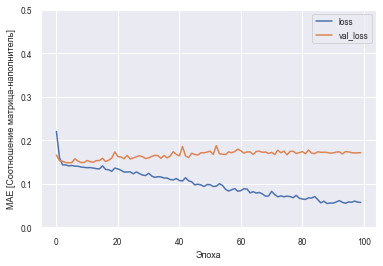

In [106]:
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.5])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [Соотношение матрица-наполнитель]')
    plt.legend()
    plt.grid(True)

In [107]:
model.save('C:/Users/User/Downloads/ВКР Моя/model')

INFO:tensorflow:Assets written to: C:/Users/User/Downloads/ВКР Моя/model\assets


In [99]:
model2 = keras.models.load_model('C:/Users/User/Downloads/ВКР Моя/model')

In [100]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30,657
Trainable params: 30,657
Non-trainable params: 0
_________________________________________________________________
